In [9]:
%pip install seaborn as sns
%pip install matplotlib as plt
%pip install pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
df = pd.read_csv('trx_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

Gráfico guardado como 'alerta_gasto_fuera_patron.png'


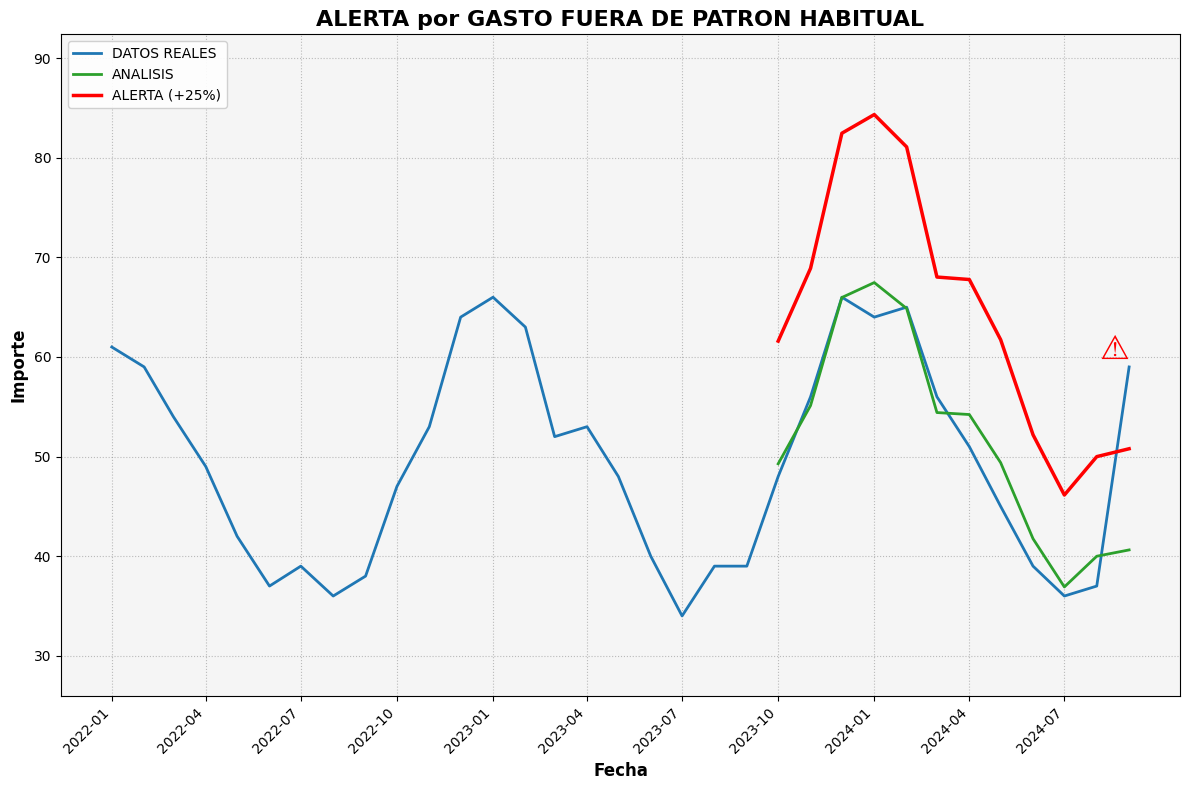


¡ALERTA! El último valor real está por encima del 25% del análisis.


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar modelo SARIMA a todos los datos
model = SARIMAX(df['Alert'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Obtener los valores ajustados (fitted values) para los últimos 12 meses
last_12_months = df.last('12M').index[0]
fitted_values = results.get_prediction(start=last_12_months).predicted_mean

# Calcular la línea de alerta (25% superior al análisis)
alert_line = fitted_values * 1.25

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Configurar el fondo del gráfico
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# Graficar todos los datos históricos en azul
plt.plot(df.index, df['Alert'], color='#1f77b4', linewidth=2, label='DATOS REALES')

# Graficar la línea SARIMA de los últimos 12 meses en verde
plt.plot(fitted_values.index, fitted_values, color='#2ca02c', linewidth=2, label='ANALISIS')

# Graficar la línea de alerta en rojo, continua y más gruesa
plt.plot(alert_line.index, alert_line, color='red', linewidth=2.5, label='ALERTA (+25%)')

# Verificar si el último valor real está por encima de la línea de alerta
last_real_value = df['Alert'].iloc[-1]
last_alert_value = alert_line.iloc[-1]

if last_real_value > last_alert_value:
    plt.text(df.index[-1], last_real_value, '\u26A0', 
             color='red', fontsize=24,
             ha='right', va='bottom')

# Configurar el eje X para mostrar todas las fechas
all_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
plt.xticks(all_dates[::3], [date.strftime('%Y-%m') for date in all_dates[::3]], rotation=45, ha='right')

# Configurar los ejes
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Importe', fontsize=12, fontweight='bold')
plt.title('ALERTA por GASTO FUERA DE PATRON HABITUAL', fontsize=16, fontweight='bold')

# Ajustar las líneas de la cuadrícula
plt.grid(True, linestyle=':', color='gray', alpha=0.5, which='both')

# Añadir la leyenda
plt.legend(loc='upper left', frameon=True, framealpha=0.9)

# Ajustar los límites del eje y para dar un poco de espacio
y_min, y_max = plt.ylim()
plt.ylim(y_min - (y_max - y_min) * 0.1, y_max + (y_max - y_min) * 0.1)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()

# Guardar el gráfico como imagen
plt.savefig('alerta_gasto_fuera_patron.png', dpi=300, bbox_inches='tight')
print("Gráfico guardado como 'alerta_gasto_fuera_patron.png'")

# Mostrar el gráfico
plt.show()

# Imprimir si el último valor real está por encima de la alerta
if last_real_value > last_alert_value:
    print("\n¡ALERTA! El último valor real está por encima del 25% del análisis.")
else:
    print("\nEl último valor real está dentro del rango esperado.")

In [13]:
%pip install seaborn as sns
%pip install matplotlib as plt
%pip install pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
df = pd.read_csv('trx_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

Gráfico guardado como 'gastos_mensuales_tendencia_y_pronostico_1mes.png'


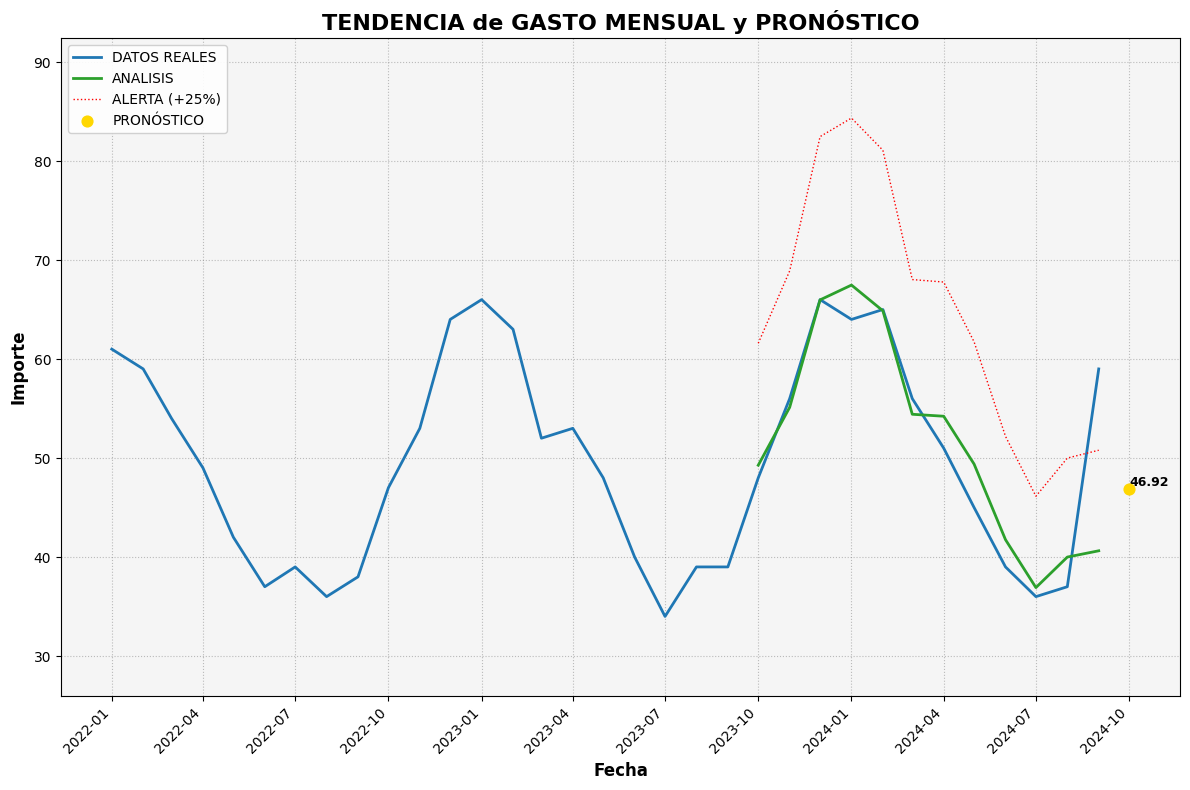


Valor pronosticado para el próximo mes:
46.920783598830155

El valor pronosticado está dentro del rango esperado.


In [16]:
# Ajustar modelo SARIMA a todos los datos
model = SARIMAX(df['Alert'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Obtener los valores ajustados (fitted values) para los últimos 12 meses
last_12_months = df.last('12M').index[0]
fitted_values = results.get_prediction(start=last_12_months).predicted_mean

# Realizar pronóstico para el próximo mes
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Calcular la línea de alerta (25% superior al análisis)
alert_line = fitted_values * 1.25

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Configurar el fondo del gráfico
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# Graficar todos los datos históricos en azul
plt.plot(df.index, df['Alert'], color='#1f77b4', linewidth=2, label='DATOS REALES')

# Graficar la línea SARIMA de los últimos 12 meses en verde
plt.plot(fitted_values.index, fitted_values, color='#2ca02c', linewidth=2, label='ANALISIS')

# Graficar la línea de alerta en rojo
plt.plot(alert_line.index, alert_line, color='red', linewidth=1, linestyle=':', label='ALERTA (+25%)')

# Graficar el punto de pronóstico para 1 mes en amarillo
plt.scatter(forecast_mean.index[0], forecast_mean.iloc[0], color='#ffd700', s=60, zorder=5, label='PRONÓSTICO')

# Añadir el valor del pronóstico como texto
plt.text(forecast_mean.index[0], forecast_mean.iloc[0], f'{forecast_mean.iloc[0]:.2f}', 
         ha='left', va='bottom', fontsize=9, weight='bold')

# Configurar el eje X para mostrar todas las fechas, incluido el pronóstico
all_dates = pd.date_range(start=df.index.min(), end=forecast_mean.index[-1], freq='MS')
plt.xticks(all_dates[::3], [date.strftime('%Y-%m') for date in all_dates[::3]], rotation=45, ha='right')

# Configurar los ejes
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Importe', fontsize=12, fontweight='bold')
plt.title('TENDENCIA de GASTO MENSUAL y PRONÓSTICO', fontsize=16, fontweight='bold')

# Ajustar las líneas de la cuadrícula
plt.grid(True, linestyle=':', color='gray', alpha=0.5, which='both')

# Añadir la leyenda
plt.legend(loc='upper left', frameon=True, framealpha=0.9)

# Ajustar los límites del eje y para dar un poco de espacio
y_min, y_max = plt.ylim()
plt.ylim(y_min - (y_max - y_min) * 0.1, y_max + (y_max - y_min) * 0.1)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()

# Guardar el gráfico como imagen
plt.savefig('gastos_mensuales_tendencia_y_pronostico_1mes.png', dpi=300, bbox_inches='tight')
print("Gráfico guardado como 'gastos_mensuales_tendencia_y_pronostico_1mes.png'")

# Mostrar el gráfico
plt.show()

# Imprimir el valor pronosticado y verificar si está por encima de la alerta
print("\nValor pronosticado para el próximo mes:")
print(forecast_mean.iloc[0])

if forecast_mean.iloc[0] > alert_line.iloc[-1]:
    print("\n¡ALERTA! El valor pronosticado está por encima del 25% del análisis.")
else:
    print("\nEl valor pronosticado está dentro del rango esperado.")